In [1]:
#!pip install tweepy

In [2]:
import pandas as pd
import numpy as np
import tweepy

In [3]:
consumer_key = '7lwWwRVcrj6X4yopfbLmq5wYN'
consumer_secret = 'Wlrqp89iUKp0YZUdEtjHHVLU2sDPEHplWqwz0OefSp4TRDzm8L'
access_token = '1095060652077531137-2xPZpsbdKxmo3XyB2r7JTWhMKy34JQ'
access_token_secret = 'IUlod3xsqmgOLcKbU8pQRh7DDb6EzAVmFHXu8OC8B4FsM'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

q = 'Real Madrid'
searched_tweets = [status for status in tweepy.Cursor(api.search, q=q).items(1000)]

In [4]:
busca = []
for tweet in searched_tweets:
    busca.append(tweet.text)

In [5]:
data = pd.DataFrame(busca, columns = ['text'])

In [6]:
data.head(5)

,text
0,New video by https://t.co/Hrppz8T50A: REAL MAD...
1,RT @iambolar: Today:\n\nLiverpool v Burnley (1...
2,Real madrid jangan buat gilaa nak beli Neymar ...
3,"El Madrid, a frenar su sangría de derrotas con..."
4,Estas fueron las palabra que Solari dirigió a ...


In [7]:
# verificar numero de palavras em uppercase (caixa alta)
data['text'].apply(lambda x: len([x for x in x.split() if x.isupper()])).sum()

1279

In [8]:
# transformando em lowcase
data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head(5)

,text
0,new video by https://t.co/hrppz8t50a: real mad...
1,rt @iambolar: today: liverpool v burnley (1pm)...
2,real madrid jangan buat gilaa nak beli neymar ...
3,"el madrid, a frenar su sangría de derrotas con..."
4,estas fueron las palabra que solari dirigió a ...


In [9]:
data['text'] = data['text'].str.replace('[^\w\s]','')
data['text'] = data['text'].str.replace('rt','')
data['text'] = data['text'].str.replace(q.lower(),'')
data.head(5)

,text
0,new video by httpstcohrppz8t50a 14 ajax ucl h...
1,iambolar today liverpool v burnley 1pm chelse...
2,jangan buat gilaa nak beli neymar ganti cr7 3...
3,el madrid a frenar su sangría de derrotas con ...
4,estas fueron las palabra que solari dirigió a ...


In [10]:
#!pip install stop-words

In [11]:
from stop_words import get_stop_words
stop = get_stop_words('spanish')

data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head(5)

,text
0,new video by httpstcohrppz8t50a 14 ajax ucl hi...
1,iambolar today liverpool v burnley 1pm chelsea...
2,jangan buat gilaa nak beli neymar ganti cr7 30...
3,madrid frenar sangría derrotas solari sentenci...
4,palabra solari dirigió prensa después entrenam...


In [12]:
# data['text']

In [13]:
import nltk
from collections import Counter

In [14]:
data['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).sort_values(ascending=False).head(5)

the    172.0
to     129.0
in     116.0
v       96.0
and     86.0
dtype: float64

In [15]:
#!pip install pillow
#!pip install wordcloud

In [16]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

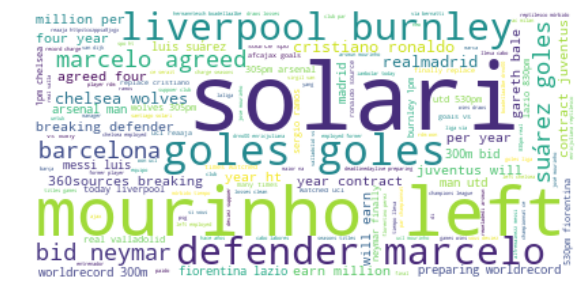

In [17]:
text = " ".join(item for item in data.text)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[15,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()